<Figure size 720x576 with 0 Axes>

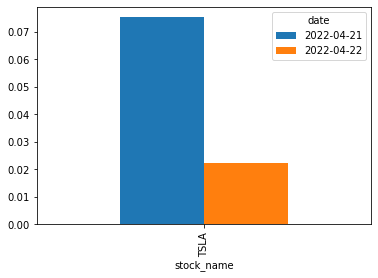

In [31]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

finviz_url = 'https://finviz.com/quote.ashx?t='
stock_name = 'TSLA'

news_tables = {}

url = finviz_url + stock_name

req = Request(url=url, headers={'user-agent': 'my-app'})
response = urlopen(req)

html = BeautifulSoup(response, features='html.parser')
news_table = html.find(id='news-table')
news_tables[stock_name] = news_table

parsed_data = []

for stock_name, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([stock_name, date, time, title])

df = pd.DataFrame(parsed_data, columns=['stock_name', 'date', 'time', 'title'])

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

plt.figure(figsize=(10,8))
mean_df = df.groupby(['stock_name', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show()

In [32]:
df

,stock_name,date,time,title,compound
0,TSLA,2022-04-22,07:33PM,Musk Swayed Wall Street by Pitching His Vision...,0.2500
1,TSLA,2022-04-22,06:07PM,Tesla Stock Vs. BYD Stock: Tesla Earnings Boom...,0.0000
2,TSLA,2022-04-22,05:09PM,Investing in Tesla Stock (TSLA),0.0000
3,TSLA,2022-04-22,04:26PM,"Stocks sell off into the close, S&P 500 on pac...",-0.3818
4,TSLA,2022-04-22,03:44PM,Republicans ask Twitter board to preserve reco...,0.0000
...,...,...,...,...,...
95,TSLA,2022-04-21,09:51AM,Dow Jones Rallies Ahead Of Powell Comments; Te...,0.0000
96,TSLA,2022-04-21,09:44AM,Teslas Stock Stands Apart From the Growth Pack...,0.3818
97,TSLA,2022-04-21,09:44AM,Tesla Gains on Musk Optimism About Overcoming ...,0.7096
98,TSLA,2022-04-21,09:35AM,Stocks open with strong gains after Tesla earn...,0.6908


In [33]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saura\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [34]:
df["Negative"] = ''
df["Neutral"] = ''
df["Positive"] = ''
df

,stock_name,date,time,title,compound,Negative,Neutral,Positive
0,TSLA,2022-04-22,07:33PM,Musk Swayed Wall Street by Pitching His Vision...,0.2500,,,
1,TSLA,2022-04-22,06:07PM,Tesla Stock Vs. BYD Stock: Tesla Earnings Boom...,0.0000,,,
2,TSLA,2022-04-22,05:09PM,Investing in Tesla Stock (TSLA),0.0000,,,
3,TSLA,2022-04-22,04:26PM,"Stocks sell off into the close, S&P 500 on pac...",-0.3818,,,
4,TSLA,2022-04-22,03:44PM,Republicans ask Twitter board to preserve reco...,0.0000,,,
...,...,...,...,...,...,...,...,...
95,TSLA,2022-04-21,09:51AM,Dow Jones Rallies Ahead Of Powell Comments; Te...,0.0000,,,
96,TSLA,2022-04-21,09:44AM,Teslas Stock Stands Apart From the Growth Pack...,0.3818,,,
97,TSLA,2022-04-21,09:44AM,Tesla Gains on Musk Optimism About Overcoming ...,0.7096,,,
98,TSLA,2022-04-21,09:35AM,Stocks open with strong gains after Tesla earn...,0.6908,,,


In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in df.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', df.loc[indexx, 'title'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        df['Negative'].iloc[indexx] = sentence_sentiment['neg']
        df['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        df['Positive'].iloc[indexx] = sentence_sentiment['pos']
    except TypeError:
        print (df.loc[indexx, 'title'])
        print (indexx)
        
df   

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,stock_name,date,time,title,compound,Negative,Neutral,Positive
0,TSLA,2022-04-22,07:33PM,Musk Swayed Wall Street by Pitching His Vision...,0.2500,0.0,0.818,0.182
1,TSLA,2022-04-22,06:07PM,Tesla Stock Vs. BYD Stock: Tesla Earnings Boom...,0.0000,0.0,1.0,0.0
2,TSLA,2022-04-22,05:09PM,Investing in Tesla Stock (TSLA),0.0000,0.0,1.0,0.0
3,TSLA,2022-04-22,04:26PM,"Stocks sell off into the close, S&P 500 on pac...",-0.3818,0.167,0.833,0.0
4,TSLA,2022-04-22,03:44PM,Republicans ask Twitter board to preserve reco...,0.0000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
95,TSLA,2022-04-21,09:51AM,Dow Jones Rallies Ahead Of Powell Comments; Te...,0.0000,0.0,1.0,0.0
96,TSLA,2022-04-21,09:44AM,Teslas Stock Stands Apart From the Growth Pack...,0.3818,0.0,0.776,0.224
97,TSLA,2022-04-21,09:44AM,Tesla Gains on Musk Optimism About Overcoming ...,0.7096,0.0,0.543,0.457
98,TSLA,2022-04-21,09:35AM,Stocks open with strong gains after Tesla earn...,0.6908,0.0,0.584,0.416


% of positive views=  38.0%
% of negative views=  25.0%
% of negative views=  37.0%


[]

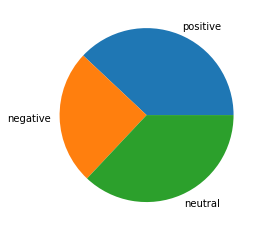

In [62]:
import matplotlib.pyplot as mlpt
posi=0
nega=0
neu=0
for i in range (0,len(df)):
    get_val=df.compound[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
    if(float(get_val==(0))):
        neu=neu+1    
posper=(posi/(len(df)))*100
negper=(nega/(len(df)))*100
neuper=(neu/(len(df)))*100

p=str(posper)+"%"
n=str(negper)+"%"
nl=str(neuper)+"%"

print("% of positive views= ",p)
print("% of negative views= ",n)
print("% of negative views= ",nl)
fig,ax = plt.subplots()
arr=np.asarray([posper,negper,neuper], dtype=int)
ax.pie(arr,labels=['positive','negative','neutral'])
ax.plot()

In [38]:
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [60]:
def wordCloudFunction(df,column,numWords):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    word_string=str(popular_words_nonstop)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=numWords,
                          width=1000,height=1000,
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()    

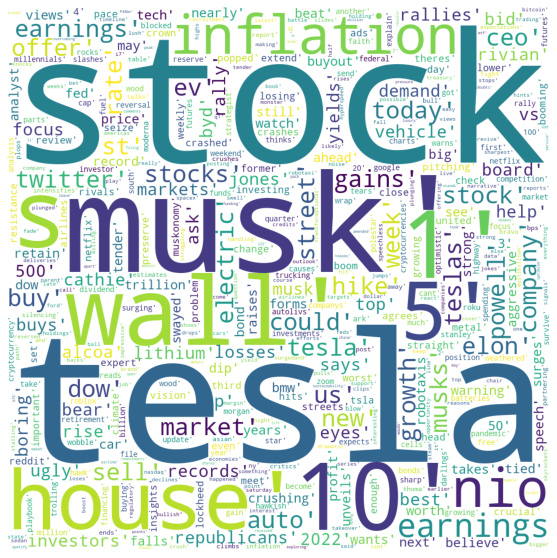

In [61]:
plt.figure(figsize=(10,10))
wordCloudFunction(df,'title',10000)

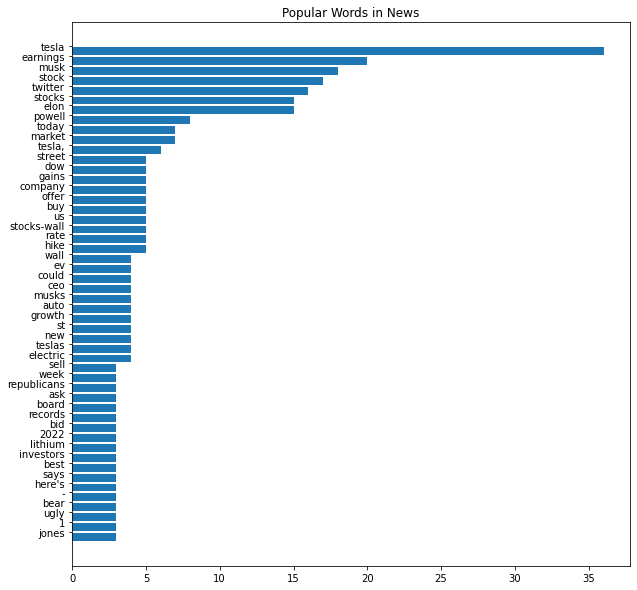

In [41]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(df,'title',"Popular Words in News")

In [51]:
def get_news(stock_name,finviz_url):
    
    news_tables = {}
    url = finviz_url + stock_name

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[stock_name] = news_table
    
    parsed_data = []

    for stock_name, news_table in news_tables.items():

        for row in news_table.findAll('tr'):

            title = row.a.text
            date_data = row.td.text.split(' ')

            if len(date_data) == 1:
                time = date_data[0]
            else:
                date = date_data[0]
                time = date_data[1]

            parsed_data.append([stock_name, date, time, title])

    df = pd.DataFrame(parsed_data, columns=['stock_name', 'date', 'time', 'title'])

    vader = SentimentIntensityAnalyzer()

    f = lambda title: vader.polarity_scores(title)['compound']
    df['compound'] = df['title'].apply(f)
    df['date'] = pd.to_datetime(df.date).dt.date
    df["Negative"] = ''
    df["Neutral"] = ''
    df["Positive"] = ''
    
    sentiment_i_a = SentimentIntensityAnalyzer()
    for indexx, row in df.T.iteritems():
        try:
            sentence_i = unicodedata.normalize('NFKD', df.loc[indexx, 'title'])
            sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
            df['Negative'].iloc[indexx] = sentence_sentiment['neg']
            df['Neutral'].iloc[indexx] = sentence_sentiment['neu']
            df['Positive'].iloc[indexx] = sentence_sentiment['pos']
        except TypeError:
            print (df.loc[indexx, 'title'])
            print (indexx)
    
    return df

In [52]:

asf = get_news(stock_name,finviz_url)
asf

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,stock_name,date,time,title,compound,Negative,Neutral,Positive
0,TSLA,2022-04-22,07:33PM,Musk Swayed Wall Street by Pitching His Vision...,0.2500,0.0,0.818,0.182
1,TSLA,2022-04-22,06:07PM,Tesla Stock Vs. BYD Stock: Tesla Earnings Boom...,0.0000,0.0,1.0,0.0
2,TSLA,2022-04-22,05:09PM,Investing in Tesla Stock (TSLA),0.0000,0.0,1.0,0.0
3,TSLA,2022-04-22,04:26PM,"Stocks sell off into the close, S&P 500 on pac...",-0.3818,0.167,0.833,0.0
4,TSLA,2022-04-22,03:44PM,Republicans ask Twitter board to preserve reco...,0.0000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
95,TSLA,2022-04-21,09:51AM,Dow Jones Rallies Ahead Of Powell Comments; Te...,0.0000,0.0,1.0,0.0
96,TSLA,2022-04-21,09:44AM,Teslas Stock Stands Apart From the Growth Pack...,0.3818,0.0,0.776,0.224
97,TSLA,2022-04-21,09:44AM,Tesla Gains on Musk Optimism About Overcoming ...,0.7096,0.0,0.543,0.457
98,TSLA,2022-04-21,09:35AM,Stocks open with strong gains after Tesla earn...,0.6908,0.0,0.584,0.416


In [58]:
def plot_cgraph(df):
   
    posi=0
    nega=0
    neu=0
    for i in range (0,len(df)):
        get_val=df.compound[i]
        if(float(get_val)<(0)):
            nega=nega+1
        if(float(get_val>(0))):
            posi=posi+1
        if(float(get_val==(0))):
            neu=neu+1    
    posper=(posi/(len(df)))*100
    negper=(nega/(len(df)))*100
    neuper=(neu/(len(df)))*100

    p=str(posper)+"%"
    n=str(negper)+"%"
    nl=str(neuper)+"%"

    print("% of positive views= ",p)
    print("% of negative views= ",n)
    print("% of negative views= ",nl)
    
    arr=np.asarray([posper,negper,neuper], dtype=int)
    mlpt.pie(arr,labels=['positive','negative','neutral'])
    mlpt.plot()

% of positive views=  38.0%
% of negative views=  25.0%
% of negative views=  37.0%


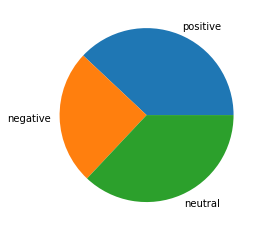

In [59]:
plot_cgraph(asf)